In [3]:
import numpy as np
from matplotlib import pyplot as plt

from dftpy.ions import Ions
from dftpy.field import DirectField
from dftpy.grid import DirectGrid
from dftpy.functional import Functional
from dftpy.formats import io

from ase.build import bulk
from ase.io import read
import ase.io

from scipy.optimize import minimize

import pickle

In [5]:
path_pp='/Users/valeria/Documents/PP/ofpp/EAC/upf/blps/'
file1='si.lda.upf'
PP_list = {'Si': path_pp+file1}

In [22]:
ks_ke = []

for i in np.arange(0,30,1):
    with open('/Users/valeria/Documents/aiWT/Final_version/wt/wt/ks_calculations/Si_bct5/DATA2/Si_bct5'+str(i)+'.out') as D:
        k = [match for match in D if "Kinetic energy" in match]
    KS_bct5 = str(k).split()[6]
    ks_ke.append(float(KS_bct5))

In [41]:
np.asarray(ks_ke)

array([17.16513681, 16.4215063 , 15.74089293, 15.11380814, 14.53928613,
       14.00957456, 13.5203386 , 13.07177712, 12.66114529, 12.28644896,
       11.94614411, 11.63753916, 11.35799167, 11.10566289, 10.87853125,
       10.67425287, 10.49075322, 10.32598172, 10.17849066, 10.04653338,
        9.92875165,  9.82383825,  9.73031215,  9.64718459,  9.57340267,
        9.5079267 ,  9.44984192,  9.39849007,  9.35323997,  9.31360266])

In [47]:
def min_energy(x0, *args):
        KS_KE, rho = args
        KE = Functional(type='KEDF',name='WT', rho0=x0)
        OF_KE = KE(rho).energy
        diff = np.abs(KS_KE*1/2-OF_KE)
        print()
        return diff, OF_KE

In [52]:
rho0[0]

array([0.03585917])

In [54]:
l = np.linspace(0.8, 1.4, 30)

delta_E = []
R0 = []
vol = []
for i, n in enumerate(l):
    rho = io.read_density('/Users/valeria/Documents/aiWT/Final_version/wt/wt/ks_calculations/Si_bct5/DATA2/rho0_bct5_'+str(i)+'.xsf')
    inputfile = '/Users/valeria/Documents/aiWT/Final_version/wt/wt/ks_calculations/Si_bct5/DATA2/Si_bct5'+str(i)+'.in'
    ions = Ions.from_ase(read(inputfile))
#     inputfile = 'bct5.vasp'
#     ions = ase.io.read(inputfile, format='vasp')
#     cell = ions.get_cell()
#     ions.set_cell(cell * l[i], scale_atoms=True) 
    KS_KE = float(ks_ke[i])
#     minn = minimize(min_energy, 0.01, args = (KS_KE, rho), method='Powell', bounds=[[0, 0.04]], options={'ftol' : 1e-9})
#     rho0 = rho0[i]
    minn, ofte = min_energy(rho0[i],KS_KE, rho)
    VOLUME = ions.get_volume()
    vol.append(VOLUME)
    delta_E.append(minn)
    R0.append(ofte)

In [57]:
np.asarray(R0)

array([8.5825684 , 8.21075315, 7.87044647, 7.55690407, 7.26964307,
       7.00478728, 6.7601693 , 6.53588856, 6.33057264, 6.14322448,
       5.97307205, 5.81876958, 5.67899584, 5.55283144, 5.43926562,
       5.33712644, 5.24537661, 5.16299086, 5.08924533, 5.02326669,
       4.96437582, 4.91191913, 4.86515607, 4.82359229, 4.78670133,
       4.75396335, 4.72492096, 4.69924504, 4.67661999, 4.65680133])

Text(0, 0.5, '$ρ_{0}$')

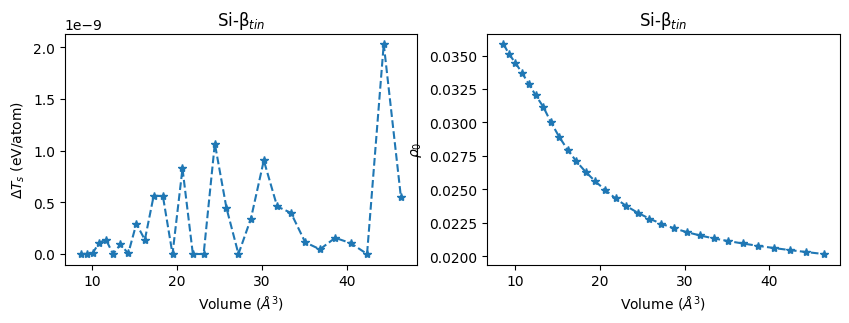

In [44]:
fig, axs = plt.subplots(1,2, figsize=(10,3))
im0 = axs[0].plot(np.asarray(vol)*0.529177**3/4,np.asarray(delta_E)*1/4,'*--')
im1 = axs[1].plot(np.asarray(vol)*0.529177**3/4,np.asarray(R0),'*--')
axs[0].set_title('Si-\u03B2$_{tin}$')
axs[1].set_title('Si-\u03B2$_{tin}$')
axs[0].set_xlabel('Volume ($\AA^{3}$)')
axs[0].set_ylabel('$\Delta T_{s}$ (eV/atom)')
axs[1].set_xlabel('Volume ($\AA^{3}$)')
axs[1].set_ylabel('$\u03C1_{0}$')

Text(0, 0.5, '$ρ_{0}$')

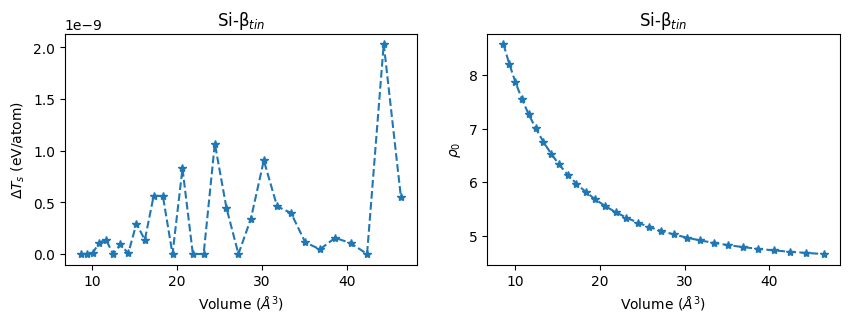

In [55]:
fig, axs = plt.subplots(1,2, figsize=(10,3))
im0 = axs[0].plot(np.asarray(vol)*0.529177**3/4,np.asarray(delta_E)*1/4,'*--')
im1 = axs[1].plot(np.asarray(vol)*0.529177**3/4,np.asarray(R0),'*--')
axs[0].set_title('Si-\u03B2$_{tin}$')
axs[1].set_title('Si-\u03B2$_{tin}$')
axs[0].set_xlabel('Volume ($\AA^{3}$)')
axs[0].set_ylabel('$\Delta T_{s}$ (eV/atom)')
axs[1].set_xlabel('Volume ($\AA^{3}$)')
axs[1].set_ylabel('$\u03C1_{0}$')

In [45]:
np.save("/Users/valeria/Documents/aiWT/Final_version/wt/wt/ks_calculations/Si_bct5/DATA2/rho0_dT.npy", np.asarray(R0))

In [49]:
rho0 = np.load("/Users/valeria/Documents/aiWT/Final_version/wt/wt/ks_calculations/Si_bct5/DATA2/rho0_dT.npy")